In [2]:
import numpy as np
import scipy.optimize as sci
from scipy import constants
import pandas as pd
from scipy.integrate import quad
import scipy.optimize as optimization
import sigfig as sf

In [3]:
import matplotlib.pyplot as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import seaborn as sns
plt.style.use(['science', 'notebook', 'grid'])
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # # Use 9pt font in plots, to match 9pt caption fontsize in RevTeX
    # "axes.labelsize": 9,
    # "font.size": 9,
    # # Make the legend/label fonts a little smaller
    # "legend.fontsize": 8,
    # "figure.titlesize": 8,
    # "xtick.labelsize": 8,
    # "ytick.labelsize": 8,
    "lines.linewidth": 1,
    "xtick.major.width": 0.5,
    "xtick.minor.width": 0.5,
    "ytick.major.width": 0.5,
    "ytick.minor.width": 0.5,
    "axes.linewidth": 0.5
}
plt.rcParams.update(tex_fonts)

In [4]:
xls = pd.ExcelFile('Dados16-10.xlsx')
Ni = pd.read_excel(xls, 'Etapa 1 - Niquel')
Cd = pd.read_excel(xls, 'Etapa 1 - Cadmio')
In = pd.read_excel(xls, 'Etapa 1 - Indio')
Rh = pd.read_excel(xls, 'Etapa 1 - Ródio')

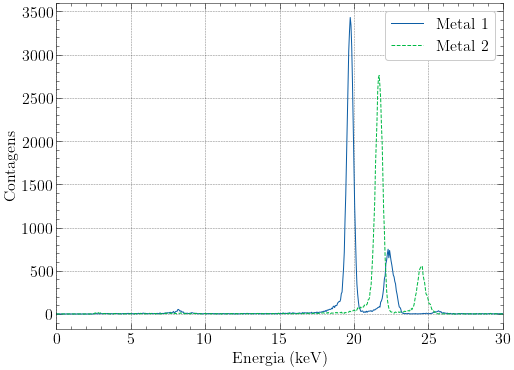

In [5]:
df1 = Rh
df2 = Cd
plt.plot(df1['Energia (keV)'], df1['Contagens'], label='Metal 1')
plt.plot(df2['Energia (keV)'], df2['Contagens'], '--', label='Metal 2')
plt.xlabel(r'Energia ($\mathrm{keV}$)')
plt.ylabel('Contagens')
plt.xlim(0,30)
plt.legend()
plt.savefig('/home/mbergamo/RhCd.png', dpi=300,bbox_inches = "tight")

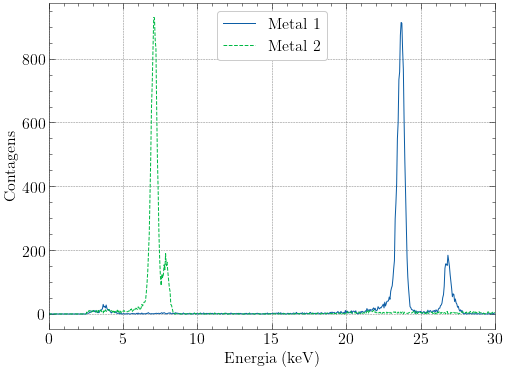

In [6]:
df1 = In
df2 = Ni
plt.plot(df1['Energia (keV)'], df1['Contagens'], label='Metal 1')
plt.plot(df2['Energia (keV)'], df2['Contagens'], '--', label='Metal 2')
plt.xlabel(r'Energia ($\mathrm{keV}$)')
plt.ylabel('Contagens')
plt.xlim(0,30)
plt.legend()
plt.savefig('/home/mbergamo/InNi.png', dpi=300,bbox_inches = "tight")

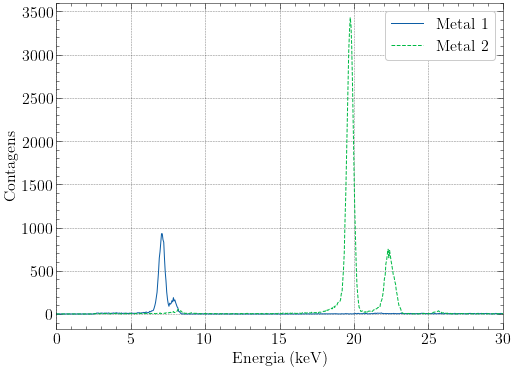

In [7]:
df1 = Ni
df2 = Rh
plt.plot(df1['Energia (keV)'], df1['Contagens'], label='Metal 1')
plt.plot(df2['Energia (keV)'], df2['Contagens'], '--', label='Metal 2')
plt.xlabel(r'Energia ($\mathrm{keV}$)')
plt.ylabel('Contagens')
plt.xlim(0,30)
plt.legend()
plt.savefig('/home/mbergamo/NiRh.png', dpi=300,bbox_inches = "tight")

In [8]:
import matplotlib.pyplot as plt
from scipy.constants import physical_constants as pc
m = pc['neutron mass energy equivalent in MeV'][0] # 939.5654205 ± 0.0000005 MeV
c = pc['speed of light in vacuum'][0]              # 299792458 m/s 

def v(T):
    return np.sqrt(2*T/m)

def v_rel(T):
    return np.sqrt(1 - 1/(1 + T/m)**2) #*c

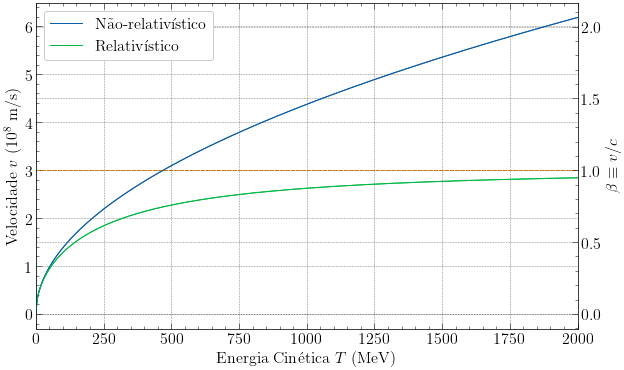

In [12]:
x = np.linspace(0, 2000, 500)
y1 = v(x)
y2 = v_rel(x)
z0 = c*np.ones(len(x))

fig, ax1 = plt.subplots(figsize=(1.618*6,6))

ax1.set_xlabel('Energia Cinética $T$ (MeV)')
ax1.set_ylabel(r'Velocidade $v$ ($10^{8}$ m/s)')
ax1.plot(x,y1*c/1e8, label = 'Não-relativístico')
ax1.plot(x,y2*c/1e8, label = 'Relativístico')
ax1.plot(x,z0/1e8,'--')
ax1.set_xlim(0, 2000)
# ax1.set_ylim(0, 6e8)


ax2 = ax1.twinx()
ax2.set_xlabel('Kinetic Energy T (MeV)')
ax2.set_ylabel(r'$\beta \equiv v/c$')
ax2.plot(x,y1, label = 'Não-relativístico')
ax2.plot(x,y2, label = 'Relativístico')
ax2.legend(framealpha=1)
fig.savefig('veloci1.pdf', dpi=350)

In [18]:
c

299792458.0

In [1]:
pip install crspectra

     |████████████████████████████████| 17.3 MB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 1.4 MB/s eta 0:00:01
  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.
scipy 1.7.1 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.1 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.24.1 which is incompa